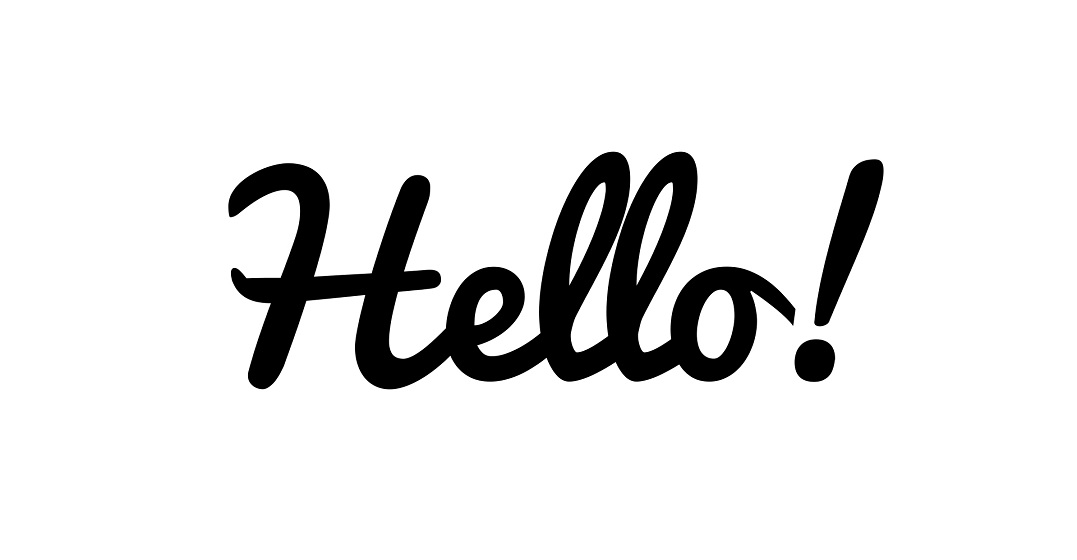

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Input,Dense, Conv2D, MaxPooling2D,Flatten, Dropout
from keras.activations import relu, linear
from keras.optimizers import Adam
from keras.losses import SparseCategoricalCrossentropy

2024-05-01 13:15:19.609216: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-01 13:15:19.609277: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-01 13:15:19.610865: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
train = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_train.csv')
test = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_test.csv')

In [3]:
train.shape

(60000, 785)

In [4]:
y_train = train['label']
X_train = train.drop('label',axis=1)

<BarContainer object of 10 artists>

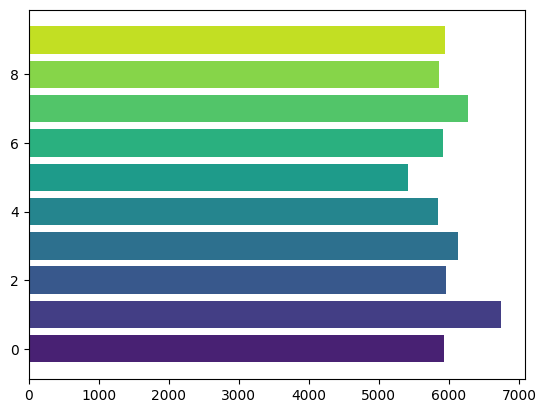

In [5]:
plt.barh(np.arange(0,10), y_train.value_counts().sort_index(),color = sns.color_palette('viridis',10))

***It's pretty balanced (no huge difference between the classes)***

# ***Plotting some images***

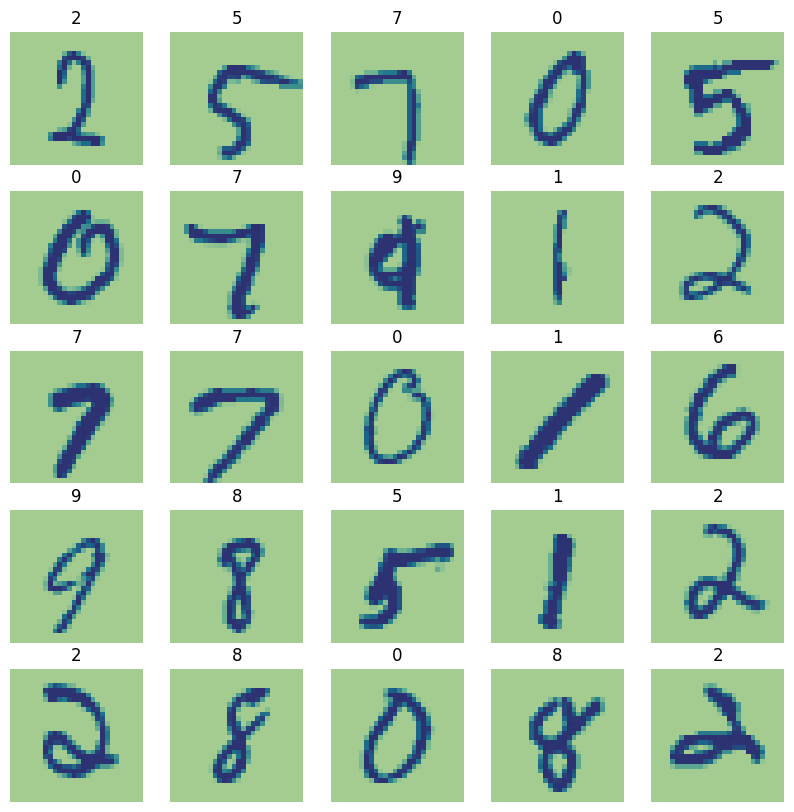

In [6]:
_,ax = plt.subplots(5,5,figsize=(10,10))
for i in ax.flat:
    random = np.random.randint(0,train.shape[0])
    i.imshow(X_train.iloc[random].values.reshape(28,28),cmap= 'crest')
    i.axis('off')
    i.set_title(y_train.iloc[random])

# ***Quick overview about the layers i'm gonna use***

**Dense Layer (Fully Connected Layer)**
* The Dense layer is the most basic layer type in neural networks. It connects every neuron in one layer to every neuron in the next layer.

**Convolutional Layer**
* They apply convolution operations to the input, typically using a set of learnable filters (kernels), which enables the network to learn spatial hierarchies of patterns.

**Pooling Layer**
* Pooling layers are used to reduce the spatial dimensions of the input, which helps in reducing computational complexity and controlling overfitting (there are max,min,average pooling)

**Dropout Layer**
* Dropout layers are used for regularization, where randomly selected neurons are ignored during training, thus preventing the network from relying too much on certain features.

**Flatten Layer**
* Flatten layers are used to flatten the input into a one-dimensional array, which is often required when transitioning from convolutional layers to fully connected layers.

# ***✨Model✨***

In [7]:
model = Sequential()

model.add(Input(shape=(28,28,1)))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64, 'relu'))
model.add(Dense(10,'linear'))

model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 9, 9, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 224,458 (876.79 KB)

 Trainable params: 224,458 (876.79 KB)

 Non-trainable params: 0 (0.00 B)

# ***Easy but effective preprocessing step***

In [8]:
X_train = X_train.values.reshape(-1,28,28,1) / 255.0

***By dividing by 255, you're scaling the pixel values down to a range between 0 and 1. This scaling ensures that all the pixel values are within a similar numeric range, which can help improve the stability and convergence of the algorithm***

In [9]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2)
X_train.shape,X_val.shape

((48000, 28, 28, 1), (12000, 28, 28, 1))

In [10]:
history = model.fit(X_train,y_train,epochs=4,validation_data=(X_val,y_val))

Epoch 1/4
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 46s 30ms/step - accuracy: 0.8939 - loss: 0.3435 - val_accuracy: 0.9787 - val_loss: 0.0713
Epoch 2/4
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9834 - loss: 0.0524 - val_accuracy: 0.9831 - val_loss: 0.0594
Epoch 3/4
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 29ms/step - accuracy: 0.9882 - loss: 0.0363 - val_accuracy: 0.9863 - val_loss: 0.0511
Epoch 4/4
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9915 - loss: 0.0261 - val_accuracy: 0.9872 - val_loss: 0.0414


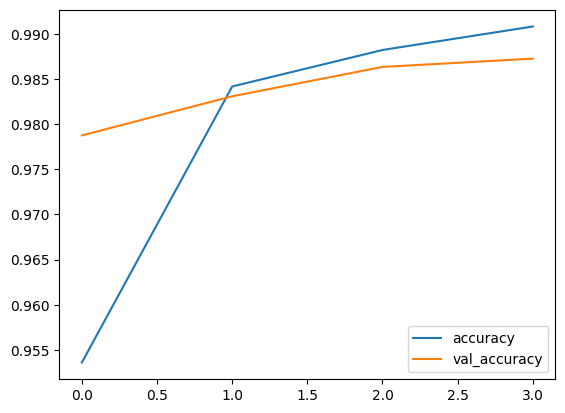

In [11]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend(loc='lower right')

In [12]:
y_test = test['label']
X_test = test.drop('label',axis=1)
X_test = X_test.values.reshape(-1,28,28,1) / 255.0
X_test.shape,y_test.shape

((10000, 28, 28, 1), (10000,))

In [13]:
predection = model.predict(X_test)
predection

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


array([[  2.223054  ,  -2.7814648 ,   5.571502  , ...,  18.751842  ,
         -1.6974016 ,   5.914532  ],
       [  0.86364406,   4.8220525 ,  15.603073  , ...,  -1.0513968 ,
          0.35113293,  -4.2619753 ],
       [ -6.445309  ,  10.096437  ,  -1.5692595 , ...,   2.3395572 ,
         -3.4905376 ,  -1.3100477 ],
       ...,
       [-10.81791   ,   1.1597099 ,  -0.90445507, ...,   2.2033184 ,
          1.8646824 ,   6.0757422 ],
       [  0.48287314,  -3.7672224 ,  -1.9315737 , ...,   0.6187031 ,
          9.253744  ,   2.7731552 ],
       [  0.8787596 ,   1.014375  ,  -0.70256627, ...,  -6.24401   ,
         -0.15403889,  -6.146365  ]], dtype=float32)

***Not a probability***
* As it's logits (Check my beginner friendly NN)

In [14]:
predection = tf.nn.softmax(predection)
np.sum(predection[0])

1.0

***That's a probability***

In [15]:
predection = np.argmax(predection,axis=1)
predection

array([7, 2, 1, ..., 4, 5, 6])

In [16]:
wrong = np.where(predection != y_test)[0]
wrong

array([  62,  115,  321,  449,  625,  646,  674,  716,  726,  740,  965,
       1014, 1039, 1112, 1242, 1247, 1299, 1328, 1393, 1414, 1459, 1522,
       1527, 1609, 1709, 1903, 1909, 2018, 2035, 2053, 2070, 2098, 2130,
       2135, 2266, 2343, 2447, 2597, 2654, 2771, 2836, 2896, 2927, 2939,
       2953, 2959, 2995, 3225, 3330, 3422, 3475, 3520, 3558, 3726, 3730,
       3751, 3853, 3906, 4007, 4163, 4201, 4265, 4289, 4382, 4571, 4699,
       4740, 4783, 4815, 4860, 5634, 5936, 5937, 5955, 5997, 6505, 6560,
       6597, 6625, 6651, 7249, 7574, 8094, 8110, 8246, 8376, 8408, 8527,
       9009, 9634, 9642, 9664, 9679, 9729, 9839])

# ***Plotting some wrong predections***

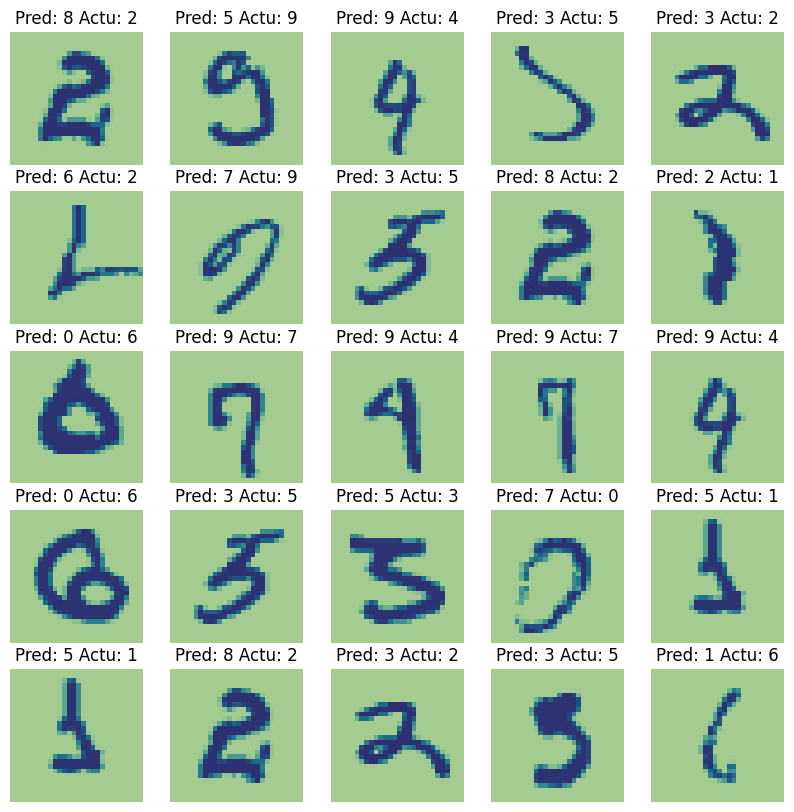

In [20]:
_,ax = plt.subplots(5,5,figsize=(10,10))
for i in ax.flat:
    random = np.random.choice(wrong)
    i.imshow(X_test[random],cmap= 'crest')
    i.axis('off')
    i.set_title(f'Pred: {predection[random]} Actu: {y_test.iloc[random]}')

<BarContainer object of 10 artists>

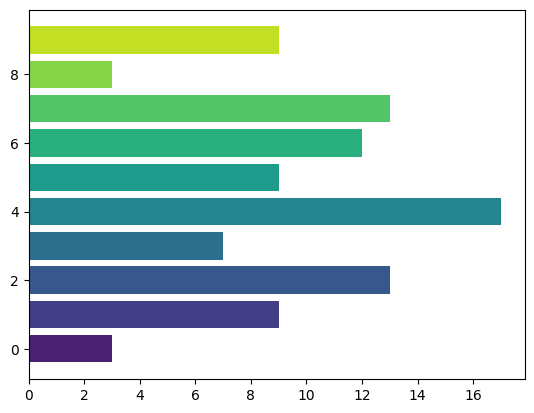

In [21]:
plt.barh(np.arange(0,10),y_test[wrong].value_counts().sort_index(),color = sns.color_palette('viridis',10))

***It performs poorly on the 4 class***